<a href="https://colab.research.google.com/github/mamekin05108/signatecup2024summer/blob/main/20240803.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

# warningsを非表示にする
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/data/train.csv")
test = pd.read_csv("/content/drive/MyDrive/Signate/2024summer/data/test.csv")

In [4]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,Designation,MonthlyIncome,customer_info,ProdTaken
0,0,50歳,Self Enquiry,2,900秒,Large Business,male,1.0,4.0,Basic,3.0,5,1,4,Executive,253905.0,未婚 車未所持 子供なし,1
1,1,56歳,Company Invited,1,14分,Salaried,Male,1.0,4.0,Standard,3.0,2,1,4,Senior Manager,404475.0,"離婚済み,車あり,子供無し",0
2,2,NaN,Self Enquiry,1,10分,Large Business,Female,1.0,3.0,Basic,3.0,4,0,4,Executive,278145.0,"結婚済み、自動車未所有,子供なし",1
3,3,三十七歳,Self Enquiry,2,1080秒,Small Business,female,1.0,3.0,Standard,4.0,1,0,5,Senior Manager,326805.0,離婚済み、車所持、子供無し,0
4,4,48歳,Company Invited,3,1020秒,Small Business,female,1.0,3.0,Basic,4.0,4,0,4,Executive,258435.0,独身／車所持／無子,1


In [49]:
rows = []
for col in test.columns:
    rows.append([col, train[col].dtype, train[col].isnull().sum(), len(train[col].unique())])
pd.DataFrame(rows, columns=["列名", "列の型", "NaNである行の数", "値の種類"])

,列名,列の型,NaNである行の数,値の種類
0,id,int64,0,3489
1,Age,object,100,238
2,TypeofContact,object,6,3
3,CityTier,int64,0,3
4,DurationOfPitch,object,121,66
5,Occupation,object,0,3
6,Gender,object,0,18
7,NumberOfPersonVisiting,float64,0,4
8,NumberOfFollowups,float64,33,12
9,ProductPitched,object,0,76


とりあえずオブジェクトについてどれだけユニークがあるか

In [6]:
for col in ["Age","DurationOfPitch","Gender","ProductPitched","NumberOfTrips","Designation","MonthlyIncome","customer_info"]:
    print(col, train[col].unique())

Age ['50歳' '56歳' nan '三十七歳' '48歳' '19歳' '47歳' '49歳' '33歳' '３１歳' '51歳' '46歳'
 '４９歳' '53才' '20歳' '25歳' '五十三歳' '20代' '44歳' '30歳' '34歳' '29歳' '30代' '41歳'
 '50代' '52歳' '22歳' '３６歳' '28歳' '25才' '五十一歳' '48才' '38才' '三十三歳' '42際' '５０代'
 '35才' '59歳' '四十三歳' '32歳' '４２才' '53歳' '58歳' '40代' '二十六歳' '52際' '54歳' '59才'
 '29才' '21才' '57歳' '37歳' '35歳' '36才' '38歳' '３７歳' '50才' '51才' '43歳' '四十歳'
 '26歳' '31歳' '27歳' '40歳' '３４歳' '40際' '21歳' '24才' '45歳' '36歳' '41才' '38際'
 '18歳' '39歳' '４６歳' '４０代' '５５歳' '58際' '24歳' '41際' '三十一歳' '52才' '３０代' '28才'
 '55際' '60代' '27際' '３２歳' '60歳' '五十四歳' '29際' '三十四歳' '４７歳' '37際' '二十四歳'
 '四十七歳' '58才' '39才' '23才' '３３歳' '４２歳' '４５歳' '３９歳' '５４歳' '55歳' '42歳' '３８歳'
 '47才' '５１歳' '３９才' '51際' '二十七歳' '30才' '２６歳' '４０歳' '36際' '三十歳' '23歳' '二十二歳'
 '37才' '３０歳' '２８歳' '34才' '五十歳' '四十一歳' '５９歳' '３５歳' '２２歳' '３７才' '四十九歳' '42才'
 '４４歳' '２５歳' '44際' '33才' '28際' '２４才' '55才' '４８歳' '四十四歳' '31才' '２０代' '二十歳'
 '22際' '31際' '二十三歳' '39際' '59際' '３３才' '三十六歳' '10代' '２７歳' '49才' '４３歳' '32際'
 '４１歳' '33際' '二十五歳' '27才' '46際' '二十九歳

In [7]:
!pip install mojimoji
import mojimoji

### 年齢
- 漢数字
- nullあり

In [44]:
def clean_age_column(df):
    def extract_age(age_str):
        if pd.isna(age_str):
            return None

        # 漢数字を数字に変換する辞書
        kanji_to_number = {
            '一': 1, '二': 2, '三': 3, '四': 4, '五': 5,
            '六': 6, '七': 7, '八': 8, '九': 9, '十': 10,
            '百': 100
        }

        # 漢数字を含む場合の処理
        age_str = str(age_str)
        result = 0
        temp_number = 0
        has_kanji = False

        i = 0
        while i < len(age_str):
            char = age_str[i]
            if char in kanji_to_number:
                num = kanji_to_number[char]
                if num == 10:
                    if temp_number == 0:
                        temp_number = 1
                    result += temp_number * 10
                    temp_number = 0
                elif num == 100:
                    if temp_number == 0:
                        temp_number = 1
                    result += temp_number * 100
                    temp_number = 0
                else:
                    temp_number = num
                has_kanji = True
            elif char.isdigit():
                if has_kanji:
                    result += temp_number
                    temp_number = 0
                result = result * 10 + int(char)
                has_kanji = False
            else:
                if temp_number > 0:
                    result += temp_number
                    temp_number = 0
                has_kanji = False
            i += 1

        if temp_number > 0:
            result += temp_number

        return result if result > 0 else None

    df['Age_Cleaned'] = df['Age'].apply(extract_age)
    return df

# trainがあなたのDataFrameであると仮定しています
train = clean_age_column(train)
test = clean_age_column(test)

In [41]:
for col in ["Age_Cleaned"]:
    print(col, train[col].unique())

Age_Cleaned [50. 56. nan 37. 48. 19. 47. 49. 33. 31. 51. 46. 53. 20. 25. 44. 30. 34.
 29. 41. 52. 22. 36. 28. 38. 42. 35. 59. 43. 32. 58. 40. 26. 54. 21. 57.
 27. 24. 45. 18. 39. 55. 60. 23. 10. 61.]


In [45]:
test.filter(items = ['Age', 'Age_Cleaned'])

,Age,Age_Cleaned
0,４８歳,48.0
1,30代,30.0
2,25歳,25.0
3,21歳,21.0
4,41歳,41.0
...,...,...
3484,41歳,41.0
3485,44歳,44.0
3486,24歳,24.0
3487,25歳,25.0


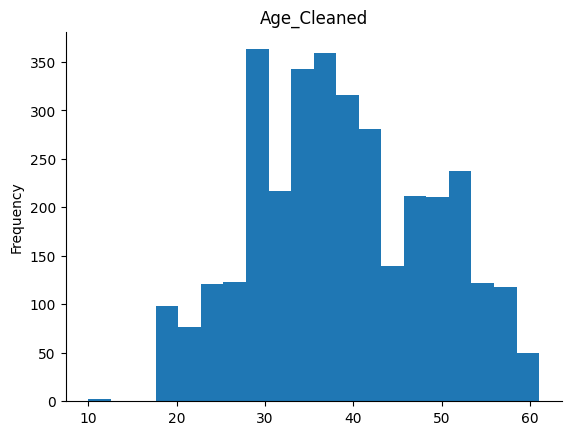

In [46]:
from matplotlib import pyplot as plt
_df_0['Age_Cleaned'].plot(kind='hist', bins=20, title='Age_Cleaned')
plt.gca().spines[['top', 'right',]].set_visible(False)

### DurationOfPitch
問題点
- 分と秒が混在していること

### Gender
- 表記にぶれ
 - 空白
 - 半角・全角混在
 - 大文字小文字


In [48]:
for col in ["Gender"]:
    print(col, test[col].unique())

Gender ['Male' 'Ｆｅｍａｌｅ' 'Female' 'MALE' 'male' 'ｍａｌｅ' 'Ｍａｌｅ' 'female' 'ＦＥＭＡＬＥ'
 'Ｆｅ\u3000Ｍａｌｅ' 'ＭＡＬＥ' 'FE MALE' 'FEMALE' 'ｆｅｍａｌｅ' 'fe male' 'Fe Male'
 'ｆｅ\u3000ｍａｌｅ']


In [68]:
def clean_gender_column(df):
    def extract_gender(gender_str):
        if pd.isna(gender_str):
            return None

        # 全角文字を半角文字に変換するための変換テーブルを作成
        zenkaku = "０１２３４５６７８９ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ　"
        hankaku = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz "
        zenkaku_to_hankaku = str.maketrans(zenkaku, hankaku)

        # 文字列を全角から半角に変換
        cleaned_str = str(gender_str).translate(zenkaku_to_hankaku)

        # 全ての空白文字（全角および半角）を一つの空白に置き換え、トリムして大文字に変換
        cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip().upper()

        cleaned_str = re.sub(r"[\u3000 \t]", "", cleaned_str)

        return cleaned_str

    df['Gender_Cleaned'] = df['Gender'].apply(extract_gender)
    return df


train = clean_gender_column(train)
test = clean_gender_column(test)

In [70]:
for col in ["Gender_Cleaned"]:
    print(col, train[col].unique())

Gender_Cleaned ['MALE' 'FEMALE']


In [71]:
test.filter(items = ['Gender', 'Gender_Cleaned'])

,Gender,Gender_Cleaned
0,Male,MALE
1,Ｆｅｍａｌｅ,FEMALE
2,Female,FEMALE
3,Male,MALE
4,MALE,MALE
...,...,...
3484,Female,FEMALE
3485,Male,MALE
3486,male,MALE
3487,MALE,MALE


from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Gender_Cleaned').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### ProductPitched

In [147]:
for col in ["ProductPitched"]:
    print(col, test[col].unique())

ProductPitched ['Super De|uxe' 'Standard' 'Basic' 'Deluxe' 'Super Deluxe' 'DELUXE' 'King'
 'standard' 'basic' 'BASIC' 'basıc' 'STANDARD' 'SUPER DELUXE' 'Ѕtandard'
 'super deluxe' '𐊡asic' 'SUPER ᎠELUXE' 'SUPER ᗞELUXE' 'Βasic' 'king'
 'Basiс' 'ꓢtandard' 'Super 𝙳eluxe' 'ᗞeluxe' 'Basi𝘤' 'Staոdard' 'deluxe'
 'DELUXΕ' 'De|uxe' 'Basıc' 'Delu×e' 'basiϲ' 'Baｓic' 'Вasic' 'Stand𝖺rd'
 'KING' 'B𝖺si𝘤' 'basiс' '𝙳eluxe' 'Ꭰeluxe' 'BASIС' 'Super ᗞeluxe'
 'STANDARᎠ' 'Stan𝔡ard' 'STΑNDARD' 'ᗞELUXE' 'Baｓıc' 'de|uxe' 'Super Ꭰeluxe'
 'Super Delu×e' 'Basıϲ' 'ꓢuper Deluxe' 'SUPΕR ᎠELUXE' 'Ꭰe|uxe' 'B𝖺sic'
 'Basiϲ' 'stan𝔡ard' 'BASΙC' 'basi𝘤' 'stand𝖺rd' 'St𝖺ndard' 'Kıng' 'baｓic'
 'Bası𝘤' 'BASΙС' 'S𝘵𝖺nda𝘳d' 'kiոg' 'Standa𝘳d' 'standar𝔡' 'Stand𝖺𝘳d'
 'BAЅIC']


In [154]:
def clean_ProductPitched_column(df):
    def extract_ProductPitched(ProductPitched_str):
        if pd.isna(ProductPitched_str):
            return None

        # 全角文字を半角文字に変換するための変換テーブルを作成
        zenkaku = "０１２３４５６７８９ＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚ　Α𝖺ВΒ𐊡Ꭰᗞ𝙳ΕꓢՏ𝘵Ѕ"
        hankaku = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz AABBBDDDESSTS"
        zenkaku_to_hankaku = str.maketrans(zenkaku, hankaku)

        # 文字列を全角から半角に変換
        cleaned_str = str(ProductPitched_str).translate(zenkaku_to_hankaku)

        # 全ての空白文字（全角および半角）を一つの空白に置き換え、トリムして大文字に変換
        cleaned_str = re.sub(r'\s+', ' ', cleaned_str).strip().upper()

        cleaned_str = re.sub(r"[\u3000 \t]", "", cleaned_str)

        # 最初の2文字に基づいてプレフィックスを追加
        if cleaned_str.startswith('SU'):
            cleaned_str = 'SUPERDELUXE'
        elif cleaned_str.startswith('BA'):
            cleaned_str = 'BASIC'
        elif cleaned_str.startswith('ST'):
            cleaned_str = 'STANDARD'
        elif cleaned_str.startswith('DE'):
            cleaned_str = 'DELUXE'
        elif cleaned_str.startswith('KI'):
            cleaned_str = 'KING'
        return cleaned_str

    df['ProductPitched_Cleaned'] = df['ProductPitched'].apply(extract_ProductPitched)
    return df

train = clean_ProductPitched_column(train)
test = clean_ProductPitched_column(test)

In [155]:
for col in ["ProductPitched_Cleaned"]:
    print(col, train[col].unique())

ProductPitched_Cleaned ['BASIC' 'STANDARD' 'SUPERDELUXE' 'DELUXE' 'KING']


In [157]:
test.filter(items = ['ProductPitched', 'ProductPitched_Cleaned'])

,ProductPitched,ProductPitched_Cleaned
0,Super De|uxe,SUPERDELUXE
1,Standard,STANDARD
2,Basic,BASIC
3,Basic,BASIC
4,Basic,BASIC
...,...,...
3484,Basic,BASIC
3485,Deluxe,DELUXE
3486,basic,BASIC
3487,Basic,BASIC


from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('ProductPitched_Cleaned').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

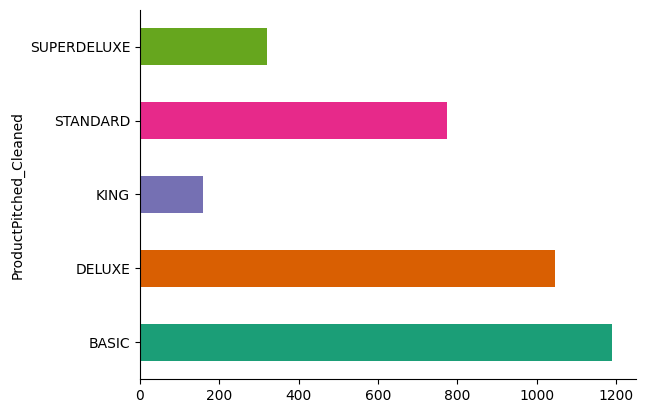

In [158]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('ProductPitched_Cleaned').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### Designation

### NumberOfTrips

### MonthlyIncome
- 月収丸々万円がいる

In [188]:
def clean_MonthlyIncome_column(df):
    def extract_MonthlyIncome(MonthlyIncome_str):
        if pd.isna(MonthlyIncome_str):
            return None

        # 文字列を小文字に変換（任意）
        #MonthlyIncome_str = str(MonthlyIncome_str).lower()

        # 数字と単位を抽出
        match = re.search(r'([\d.,]+)\s*(万|千)?', MonthlyIncome_str)

        if match:
            number_str, unit = match.groups()
            number_str = number_str.replace(',', '')  # カンマを削除
            number = float(number_str)

            # 単位に応じて数値を変換
            if unit == '万':
                income = number * 10000
            elif unit == '千':
                income = number * 1000
            else:
                income = number
        else:
            # マッチしない場合は NaN
            income = None

        return income

    df['MonthlyIncome_Cleaned'] = df['MonthlyIncome'].apply(extract_MonthlyIncome)
    return df

# trainがあなたのDataFrameであると仮定しています
train = clean_MonthlyIncome_column(train)
test = clean_MonthlyIncome_column(test)

In [181]:
for col in ["MonthlyIncome_Cleaned"]:
    print(col, train[col].unique())

MonthlyIncome_Cleaned [253905. 404475. 278145. ... 317340. 527910. 278190.]


In [189]:
test.filter(items = ['MonthlyIncome', 'MonthlyIncome_Cleaned'])

,MonthlyIncome,MonthlyIncome_Cleaned
0,496950.0,496950.0
1,月収30.0万円,300000.0
2,月収26.0万円,260000.0
3,259875.0,259875.0
4,268830.0,268830.0
5,NaN,NaN
6,259755.0,259755.0
7,月収40.0万円,400000.0
8,月収25.0万円,250000.0
9,263415.0,263415.0


### customer_info
- 結婚
- 車
- 子供  

に分けることができそう。ただしいずれも表示にぶれあり  
区切りもスペース改行スラッシュコンマといろいろなのでいったん何かに置換すべき